In [1]:
from Define_Paulis import I, X, Y, Z, Mdot, bkt
import numpy as np
import scipy.linalg as ln

In [2]:
def RH(theta,i,N):
    return Mdot([Z(i,N),np.cos(theta/2)*I(N) - 1j*np.sin(theta/2)*Y(i,N)])

In [80]:
def M(s,i,N):
    return 1/2*(I(N)+s*Z(i,N))

def U(phil):
    N = len(phil)
    U = I(N)
    for i in range(N):
        Ui = np.cos(phil[i])*I(N) + 1j*np.sin(phil[i])*( (Mdot([X(i,N),X(np.mod(i+1,N),N)])) + Mdot([Y(i,N),Y(np.mod(i+1,N),N)]) )
        U = Mdot([Ui,U])
    return U

In [81]:
M(1,1,2)


array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]])

In [296]:
def psi0(N):
    out = np.array([0 for i in range(2**N)])
    out[1] = 1
    return out

N = 6
t = 0.3
Pl = []
timel = []
Mrate = [12,10,8,6,4,2]
phil = [t,t,t,t,t,0]
psit = psi0(N)
for mt in range(500):
    psit = Mdot([U(phil),psit])
    psit = psit/np.sqrt(bkt(psit,I(N),psit))
    Pil = []
    sitel = []
    for i in range(N):
        Pi = bkt(psit,M(-1,i,N),psit)
        if np.mod(mt,Mrate[i]) == 0:
            if random() > Pi:
                psit = Mdot([M(1,i,N),psit])
            else:
                psit = Mdot([M(-1,i,N),psit])
                Mrate[i] = Mrate[i]*0.9

            psit = psit/np.sqrt(bkt(psit,I(N),psit))
        Pi2 = bkt(psit,M(-1,i,N),psit)
        Pil.append(Pi2)
        sitel.append(i)
        #print(mt,i,Pi,Pi2)
    Pl.append(Pil)
    timel.append(mt)
    #print(np.round(Pil,4))

In [297]:
Mrate

[10.8, 8.1, 7.2, 5.4, 3.6, 1.8]

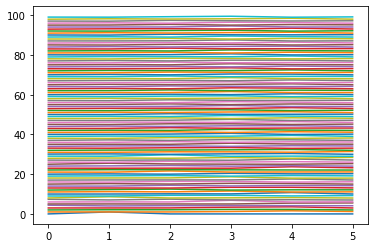

In [298]:
for i in range(0,len(Pl),5):
    shift = [Pl[i][j] + 0.2*i for j in range(N)]
    plt.plot(sitel,shift)

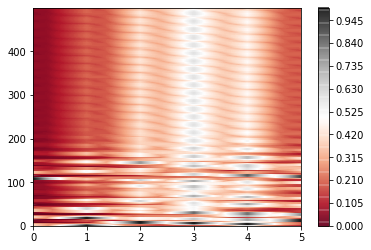

In [299]:
import matplotlib.pyplot as plt

plt.contour(sitel,timel,Pl, 200, cmap='RdGy')
plt.colorbar();

In [300]:
Pl[-1]

[(0.02335094706654772+0j),
 (0.17913286812649937+0j),
 (0.0013262568144949392+0j),
 (0.5027481802742954+0j),
 (0.2804183429255985+0j),
 (0.013023404792564107+0j)]